In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
df = pd.read_csv("../data/data_all_surfaces.csv")


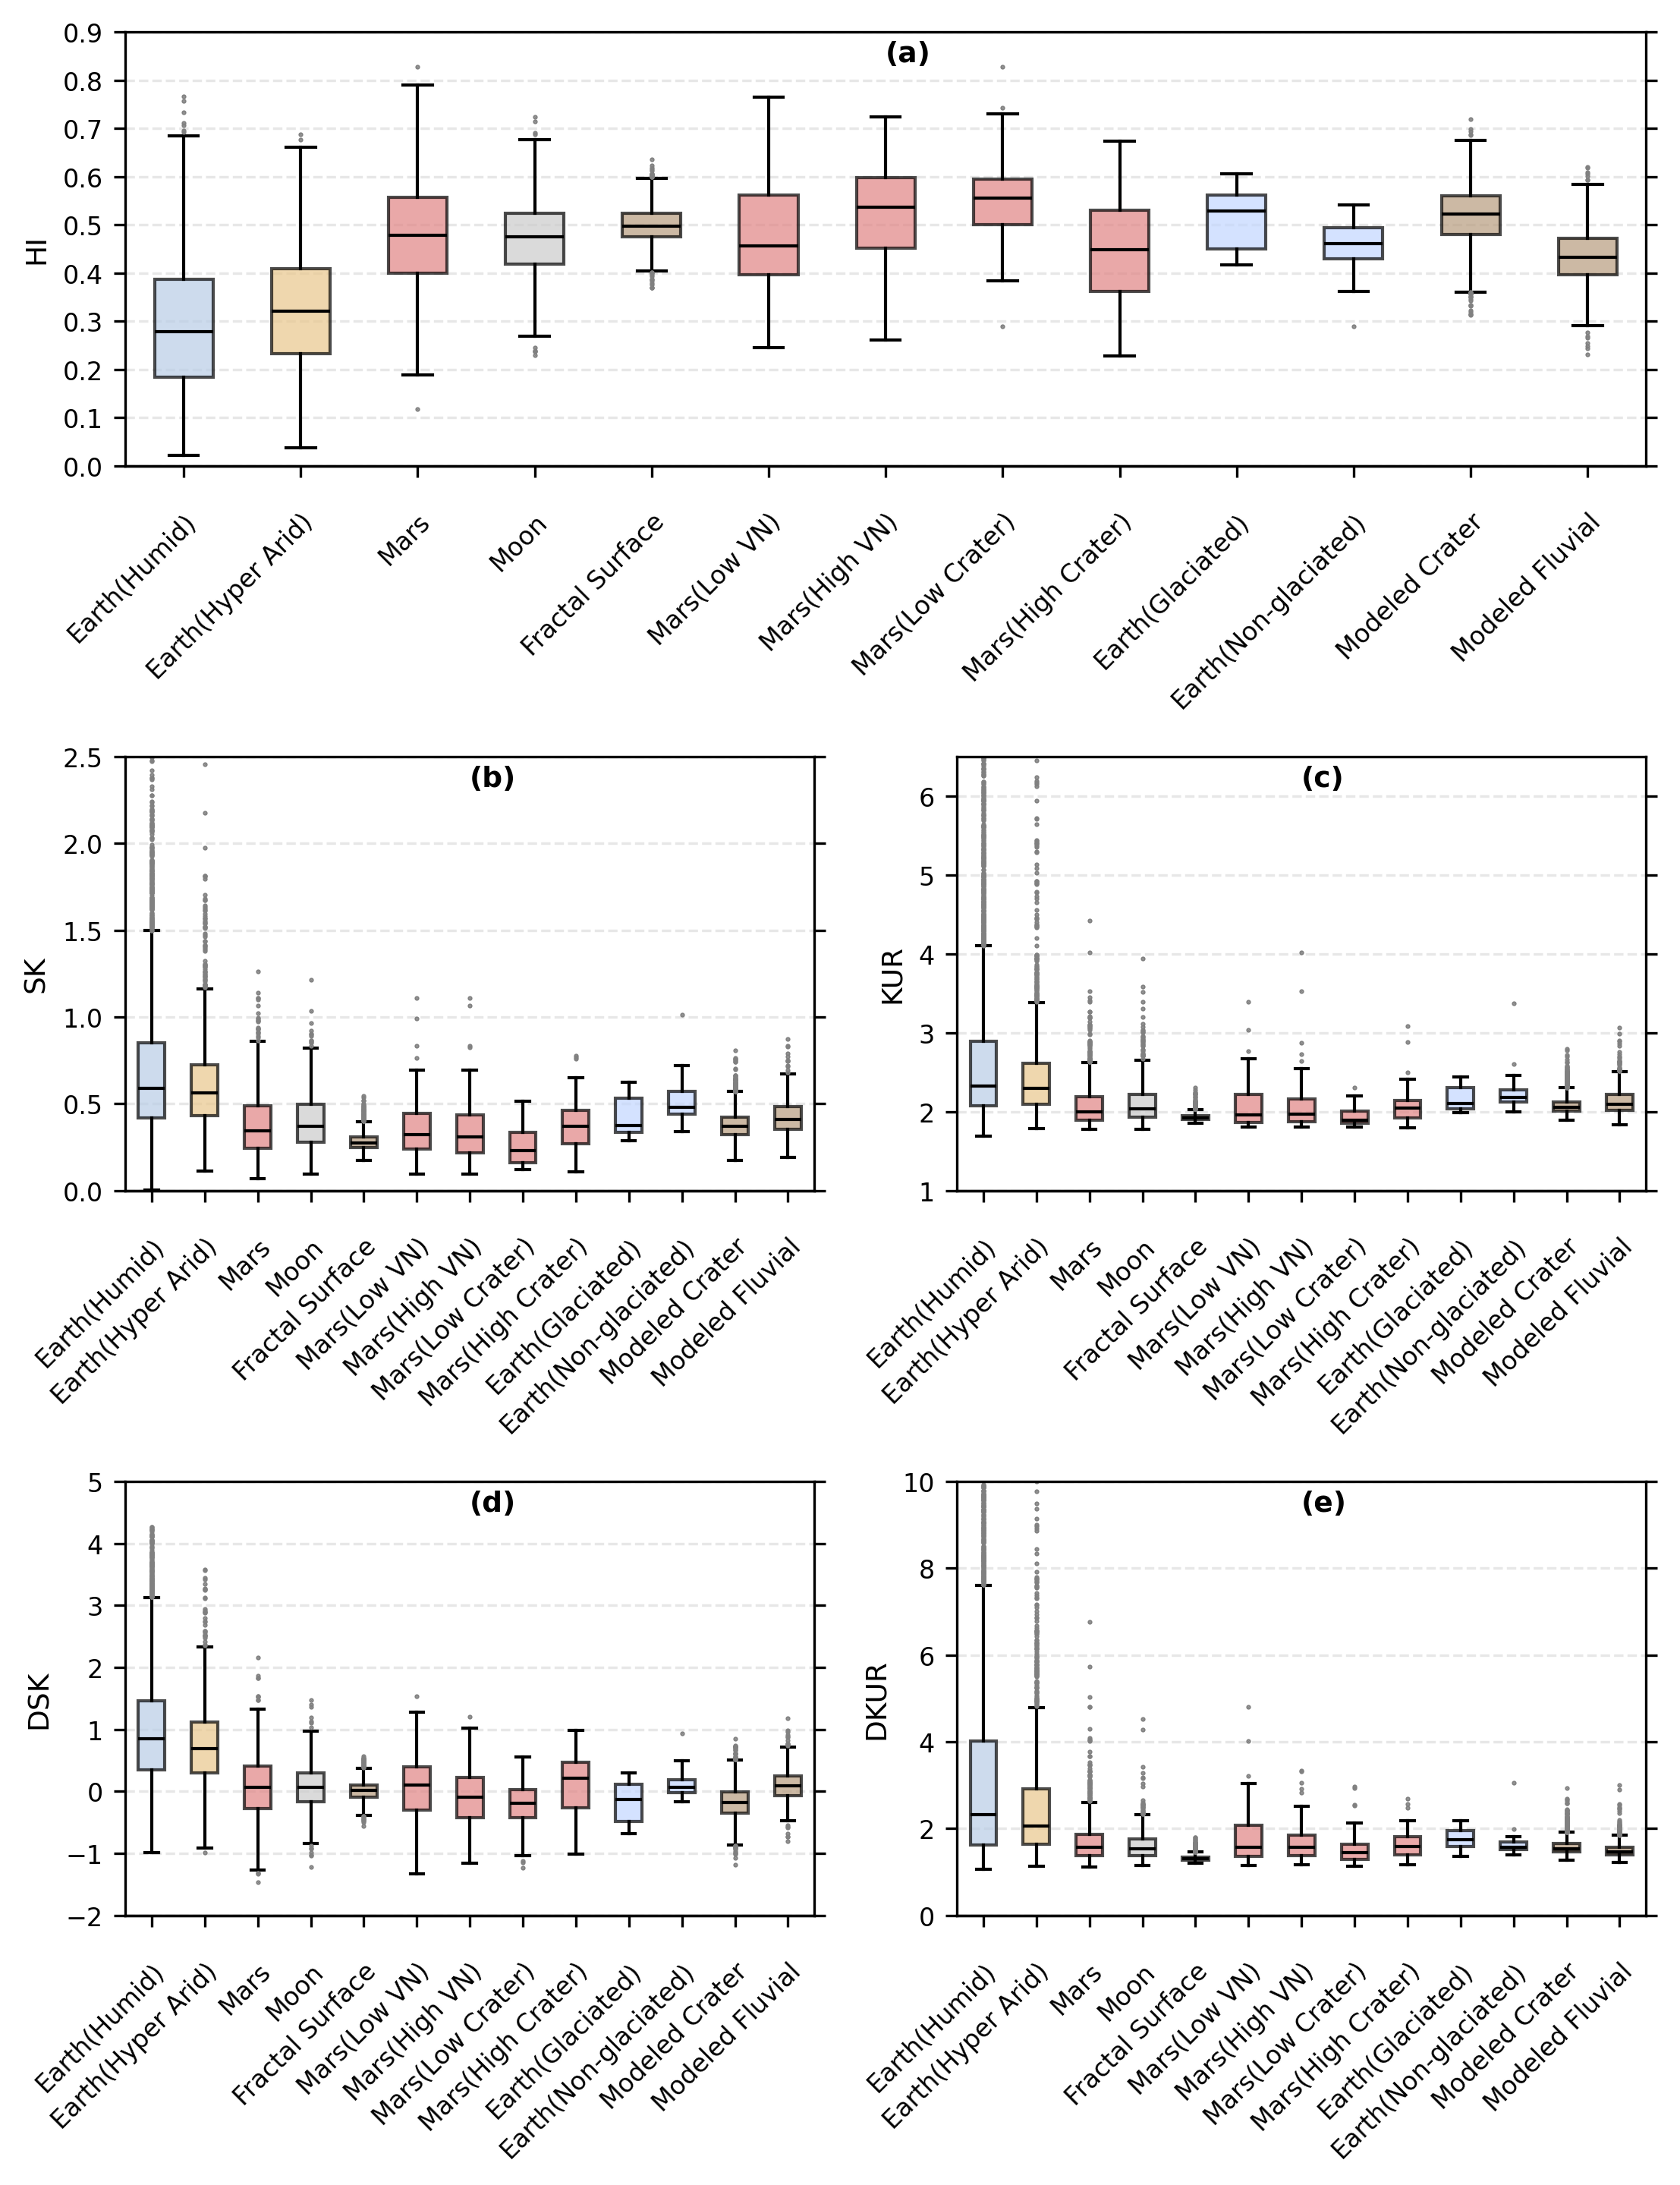

In [8]:
# Define the correct order as specified
surface_order = [
    'Earth (humid)', 'Earth (hyper arid)', 'Mars', 'Moon', 'Fractal Surface',
    'Mars_low_vn', 'Mars_high_vn', 'Mars_low_crater', 'Mars_high_crater',
    'Earth_glaciated', 'Earth_non_glaciated', 'model_crater', 'model_fluvial'
]

# Define display names in the same order as surface_order
surface_display_names = [
    'Earth(Humid)', 'Earth(Hyper Arid)', 'Mars', 'Moon', 'Fractal Surface',
    'Mars(Low VN)', 'Mars(High VN)', 'Mars(Low Crater)', 'Mars(High Crater)',
    'Earth(Glaciated)', 'Earth(Non-glaciated)', 'Modeled Crater',
    'Modeled Fluvial'
]

# Parameters to plot
parameters = ['HI', 'SK', 'KUR', 'DSK', 'DKUR']

# Create color palette
colors = ['#b8cde6', '#e9c78c', '#e08484', '#cbcbcb', '#b79c7e',
          '#e08484', '#e08484', '#e08484', '#e08484', '#c2d6ff',
          '#c2d6ff', '#b79c7e', '#b79c7e']

# Create figure with a 3x2 subplot layout
fig = plt.figure(figsize=(7.48, 9.7), dpi=300) 
gs = fig.add_gridspec(3, 2, height_ratios=[1, 1, 1])

# Create the top row spanning both columns for HI
ax_top = fig.add_subplot(gs[0, :])
axes = [ax_top]
axes.extend([
    fig.add_subplot(gs[1, 0]),
    fig.add_subplot(gs[1, 1]),
    fig.add_subplot(gs[2, 0]),
    fig.add_subplot(gs[2, 1])
])

# Function to prepare box plot data
def prepare_boxplot_data(df, param, order):
    return [df[df['Surface'] == surface][param].values for surface in order]

# Create boxplot for each parameter
for i, param in enumerate(parameters):
    ax = axes[i]
    
    # Get data for each surface in order
    box_data = prepare_boxplot_data(df, param, surface_order)
    
    # Create the boxplot
    bp = ax.boxplot(box_data, 
                    patch_artist=True,  # Fill boxes with color
                    medianprops=dict(color="black"),  # Black median lines
                    flierprops=dict(marker='.', markerfacecolor='gray', markeredgecolor='gray', markersize=1),  # Outlier style
                    widths=0.5)  # Box width
    
    # Color the boxes
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    # Set x-axis ticks and labels with adjusted positioning
    ax.set_xticks(range(1, len(surface_order) + 1))
    ax.set_xticklabels(surface_display_names, rotation=45, ha='right', rotation_mode='anchor')
    ax.tick_params(axis='x', which='major', pad=5)  # Increased padding between ticks and labels
    
    # Adjust font sizes
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.tick_params(axis='x', pad=10)
    
    # Set labels
    ax.set_xlabel('')
    ax.set_ylabel(param, fontsize=9)
    
    # Adjust y-axis limits
    if param == 'HI':
        ax.set_ylim(0, 0.9)
    elif param == 'SK':
        ax.set_ylim(0, 2.5)
    elif param == 'KUR':
        ax.set_ylim(1, 6.5)
    elif param == 'DSK':
        ax.set_ylim(-2, 5)
    elif param == 'DKUR':
        ax.set_ylim(0, 10)
    
    # Add grid
    ax.yaxis.grid(True, linestyle='--', alpha=0.3)
    ax.set_axisbelow(True)  # Put grid below boxes
    
    # Add right y-axis with exactly matching ticks
    ax2 = ax.twinx()
    
    # Set y limits and ticks based on parameter
    if param == 'HI':
        ylim = (0, 0.9)
        yticks = np.arange(0, 1.0, 0.1)
    elif param == 'SK':
        ylim = (0, 2.5)
        yticks = np.arange(0, 3.0, 0.5)
    elif param == 'KUR':
        ylim = (1, 6.5)
        yticks = np.arange(1, 7.0, 1.0)
    elif param == 'DSK':
        ylim = (-2, 5)
        yticks = np.arange(-2, 6.0, 1.0)
    elif param == 'DKUR':
        ylim = (0, 10)
        yticks = np.arange(0, 11.0, 2.0)
    
    # Apply the same limits and ticks to both axes
    ax.set_ylim(ylim)
    ax.set_yticks(yticks)
    ax2.set_ylim(ylim)
    ax2.set_yticks(yticks)
    ax2.set_yticklabels([])  # No labels for right axis
    
    # Style the spines
    ax.spines['top'].set_visible(True)  # Remove top spine
    ax.spines['right'].set_visible(False)  # Hide original right spine
    ax2.spines['top'].set_visible(False)  # Remove top spine
    ax2.spines['left'].set_visible(False)  # Hide secondary left spine
    
    # Add subplot labels (a), (b), (c), (d), (e)
    ax.text(0.5, 0.98, f'({chr(97+i)})',
            transform=ax.transAxes,
            fontsize=9, fontweight='bold',
            verticalalignment='top')

# Adjust layout
plt.tight_layout()
plt.show()

Because we set y-lim for best result, we can analyze outliers that are outside the plot bounds

In [5]:
def analyze_outliers(df, param, ylim, surface):
    data = df[df['Surface'] == surface][param]
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = data[(data < lower_bound) | (data > upper_bound)]
    out_of_bounds = data[(data < ylim[0]) | (data > ylim[1])]

    if len(out_of_bounds) > 0:
        return f"{surface}: {len(out_of_bounds)} outliers outside plot bounds [{ylim[0]}-{ylim[1]}], max={data.max():.2f}, min={data.min():.2f}"
    return None

# Define the limits for each parameter for 
ylims = {
    'HI': (0, 0.9),
    'SK': (0, 2.5),
    'KUR': (1, 6.5),
    'DSK': (-2, 5),
    'DKUR': (0, 10)
}

# Dictionary to map parameters to subplot labels
param_to_label = {
    'HI': '(a)',
    'SK': '(b)',
    'KUR': '(c)',
    'DSK': '(d)',
    'DKUR': '(e)'
}

for param, ylim in ylims.items():
    print(f"\nAnalyzing {param_to_label[param]} ({param}):")
    for surface in surface_order:
        result = analyze_outliers(df, param, ylim, surface)
        if result:
            print(result)
        



Analyzing (a) (HI):

Analyzing (b) (SK):
Earth (humid): 5 outliers outside plot bounds [0-2.5], max=2.63, min=0.00

Analyzing (c) (KUR):
Earth (humid): 101 outliers outside plot bounds [1-6.5], max=11.13, min=1.69
Earth (hyper arid): 5 outliers outside plot bounds [1-6.5], max=10.09, min=1.79

Analyzing (d) (DSK):

Analyzing (e) (DKUR):
Earth (humid): 277 outliers outside plot bounds [0-10], max=22.85, min=1.07
Earth (hyper arid): 22 outliers outside plot bounds [0-10], max=17.18, min=1.14
